In [33]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [34]:
path = '../Scented_candles/Scented_candles/'
filenames = ['18387-Yankee-Vanilla.csv',
           '18623-Yankee-Home.csv',
           '21111-Yankee-Cinnamon.csv',
           '23833-Glade- Vanilla.csv',
           '23902-Yankee-Citrus.csv',
           '25872-Lulu-Soy.csv',
           '29652-Yankee-Lilac.csv',
           '35297-Chesapeake Bay-Pear.csv',
           '44413-Yankee-Cedar.csv',
           '9262-Mrs.Meyers-Soy.csv']

In [35]:
#combined_csv = pd.concat([pd.read_csv(path + f) for f in filenames ])
#combined_csv.to_csv( "combined_csv.csv", index=False)

In [36]:
df = pd.DataFrame()

In [37]:
for f in filenames:
    aux = pd.read_csv(path+f)
    print(f'{f}: {aux.shape[0]}')

18387-Yankee-Vanilla.csv: 2622
18623-Yankee-Home.csv: 1711
21111-Yankee-Cinnamon.csv: 2723
23833-Glade- Vanilla.csv: 1450
23902-Yankee-Citrus.csv: 2984
25872-Lulu-Soy.csv: 5000
29652-Yankee-Lilac.csv: 4498
35297-Chesapeake Bay-Pear.csv: 5000
44413-Yankee-Cedar.csv: 5000
9262-Mrs.Meyers-Soy.csv: 1420


In [38]:
for f in filenames:
    aux = pd.read_csv(path+f)
    aux.loc[:, 'Brand'] = f.split('-')[1]
    aux.loc[:, 'Model'] = f.split('-')[2].split('.')[0]
    df = pd.concat([df, aux], ignore_index=True)

In [39]:
df = df[df.date.str.contains('United States')]
df = df.reset_index()
df = df.drop(['id', 'profileName', 'images', 'Size', 'Pattern Name', 'Color', 'Scent', 'Style', 'index'], axis=1)

In [40]:
for i in range(df.shape[0]):
    df.loc[i, 'date'] = parse(df.loc[i, 'date'], fuzzy_with_tokens=True)[0]

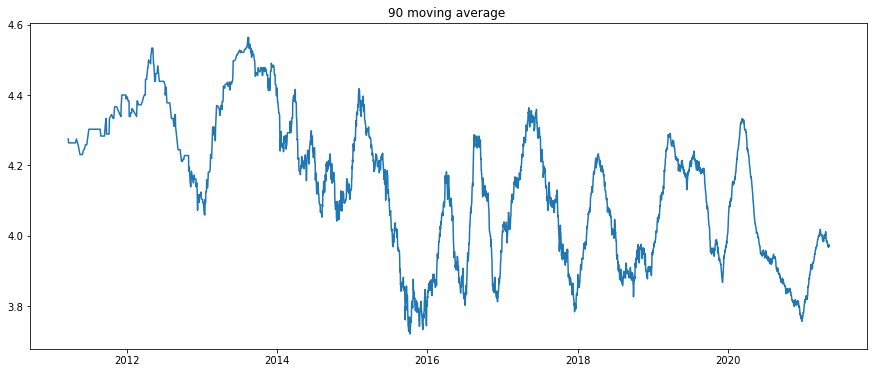

In [41]:
#df.groupby('date').mean()['rating']
days = df.groupby('date').mean()['rating']
plt.figure(figsize=(15,6))
plt.title('90 moving average ')
plt.plot(days.index[90:], days.rolling(90).mean()[90:])
plt.show()

In [42]:
df = df.dropna()
df.to_csv(path_or_buf='../Datasets/US_Scented_Candles.csv', index=False)